<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Applying_Gaussian_Discriminant_Analysis_to_Multi_Variable_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Confusion Matrix:
 [[460  60   0]
 [ 23 396  19]
 [  0  84 958]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.92       520
           1       0.73      0.90      0.81       438
           2       0.98      0.92      0.95      1042

    accuracy                           0.91      2000
   macro avg       0.89      0.90      0.89      2000
weighted avg       0.92      0.91      0.91      2000



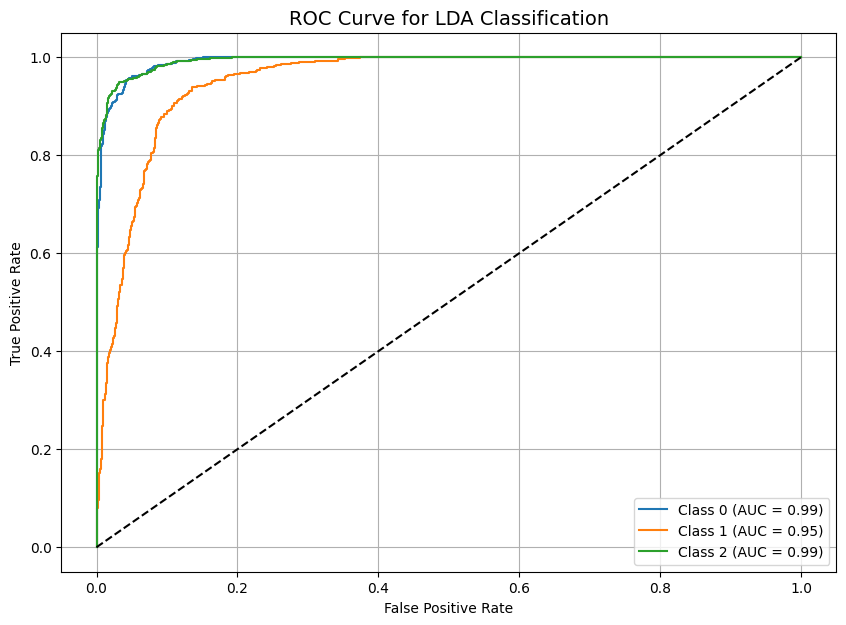

Class 0 AUC: 0.99
Class 1 AUC: 0.95
Class 2 AUC: 0.99


In [1]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# I feel a sense of creativity as I generate this high-dimensional dataset, aiming to emulate the intricacies of real-world eCommerce scenarios. By setting a seed, I ensure that my data remains reproducible, which gives me confidence in my experiments.
np.random.seed(42)
n_samples = 10000
n_features = 400

# As I create the synthetic data, I notice how random noise can introduce both challenges and opportunities for modeling. This randomness keeps me grounded, reminding me of the unpredictability of real data.
X = np.random.randn(n_samples, n_features)
classes = 3

# I realize that defining a rule for class assignment pushes me to think critically about feature importance. My approach to using the first 20 features reflects my curiosity about how specific subsets of data can influence the outcome.
def assign_class(x):
    """Artificial rule to assign classes based on feature values."""
    score = x[:10].sum() - x[10:20].mean()
    if score > 2:
        return 0
    elif score > 0:
        return 1
    else:
        return 2

# I feel a sense of accomplishment as I see my class assignment logic applied across the dataset. It's fascinating to think about how these artificial rules might parallel real-world classification challenges.
y = np.apply_along_axis(assign_class, axis=1, arr=X)

# When I split the data into training and testing sets, I remind myself how crucial it is to ensure proper validation. This split reinforces my commitment to building a robust evaluation pipeline.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the LDA model feels like a moment of clarity. I appreciate how this step distills high-dimensional data into a more interpretable framework, emphasizing the essence of each class.
lda = LDA()
lda.fit(X_train, y_train)

# As I make predictions, I reflect on how each decision by the model represents a culmination of my earlier efforts. The probabilistic outputs remind me of the inherent uncertainty in classification tasks.
y_pred = lda.predict(X_test)
y_pred_prob = lda.predict_proba(X_test)

# Examining the confusion matrix gives me insight into where the model excels and where it struggles. I find myself pondering ways to refine the model and reduce misclassifications.
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# When I review the classification report, I think about the precision and recall for each class. These metrics make me reflect on the balance between sensitivity and specificity in my model.
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plotting the ROC curves feels rewarding. As I observe the trade-offs between true positive and false positive rates, I consider how these curves encapsulate the model's overall performance.
plt.figure(figsize=(10, 7))
for i in range(classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve for LDA Classification", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.grid()
plt.show()

# Calculating the AUC for each class reinforces my understanding of the model's discriminative power. I find myself appreciating the mathematical elegance behind these performance measures.
for i in range(classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    print(f"Class {i} AUC: {roc_auc:.2f}")








